In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## 1. 데이터 정보 확인

In [19]:
hbg = pd.read_csv("./data/hbg_result1591.csv", index_col=0)
hbg = hbg[["ID", "Contents", "Tags", "Like"]]
# hbg.columns = ["UserId", "Contents", "Tags", "Like"]
hbg.head()

,ID,Contents,Tags,Like
0,book5657s,"""연봉 100억"" 일타강사 이지영,,다이어트 방법데일리 업데잇 @book5657s ...","['#약수핫플', '#경성대맛집', '#양천구떡케이크', '#신촌네일', '#동안구...",12
1,etc_zine,?세계적인 스타 셰프 고든램지의 '고든 램지 버거'가 캐주얼 콘셉트로 새롭게 '고든...,[],395
2,songs_kitchens,.아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠??송탄미군부대 앞에 있는 #미스진...,"['#미스진버거미군들한테', '#송탄', '#미스진버거??스페셜A(7', '#송탄맛...",1517
3,mukseein,?<통새우폭탄버거>?????????????????먹시인입 속을 가득 채우는 탱글한 ...,"['#왓더버거??', '#직화통새우버거', '#셧더버거', '#햄버거맛집', '#새...",4265
4,lady_good_tip,꿀 같은데 헬인 알바 모음??@@카페 알바 누가 꿀이래ㅜㅜ.오늘의 꿀팁은?? @la...,"['#헬', '#헬인알바', '#꿀알바', '#알바모음', '#아르바이트', '#카...",664


In [20]:
hbg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1591 non-null   object
 1   Contents  1591 non-null   object
 2   Tags      1591 non-null   object
 3   Like      1591 non-null   object
dtypes: object(4)
memory usage: 62.1+ KB


## 2. 전처리1

#### 기본 전처리
- content/tag 특수문자 제거

In [21]:
h = hbg.copy()

In [22]:
# contents 특수기호 및 문자 제거
h["Contents"] = h["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

# # tags # 제외한 특수 기호 제거
h["Tags"] = h["Tags"].str.strip("]['")
h["Tags"] = h["Tags"].str.replace("'", repl=r"", regex=True)

In [23]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1591 non-null   object
 1   Contents  1591 non-null   object
 2   Tags      1591 non-null   object
 3   Like      1591 non-null   object
dtypes: object(4)
memory usage: 62.1+ KB


- like 전처리(이상값 대체 / int 형식으로 변환)

In [52]:
like_num = h[~(h["Like"].str.contains("좋아합니")|h["Like"].str.contains("눌러보세"))]["Like"]
like_notnum = h[(h["Like"].str.contains("좋아합니")|h["Like"].str.contains("눌러보세"))]["Like"]
like_num = like_num.astype("int")

<AxesSubplot:>

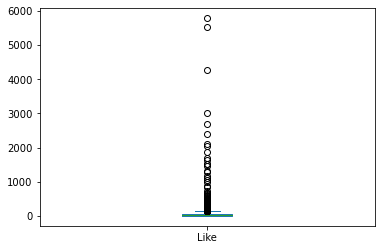

In [58]:
like_num.plot.box()
# 중간값으로 하기!

In [59]:
num = h[~(h["Like"].str.contains("좋아합니")|h["Like"].str.contains("눌러보세"))]["Like"]
num = num.astype(int)
num.median()

25.0

In [60]:
h["Like"].str.contains("좋아합니").value_counts()

False    1338
True      253
Name: Like, dtype: int64

In [61]:
h["Like"].str.contains("눌러보세").value_counts()

False    1584
True        7
Name: Like, dtype: int64

In [62]:
like_str_idx = h[h["Like"].str.contains("좋아합니")].index
like_0_idx = h[h["Like"].str.contains("눌러보세")].index

In [63]:
for i in range(len(h)):
    for j in like_str_idx:
        for k in like_0_idx:
            if i==j:
                h["Like"][j]=25.0
            if i==k:
                h["Like"][k]=0
            else:
                continue

In [64]:
h["Like"].str.contains("좋아합니").value_counts()

False    1331
Name: Like, dtype: int64

In [65]:
h["Like"].str.contains("눌러보세").value_counts()

False    1331
Name: Like, dtype: int64

In [66]:
h["Like"] = h["Like"].astype("int")

In [67]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1591 non-null   object
 1   Contents  1591 non-null   object
 2   Tags      1591 non-null   object
 3   Like      1591 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 120.5+ KB


In [68]:
h.head()

,ID,Contents,Tags,Like
0,book5657s,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데...",12
1,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395
2,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517
3,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265
4,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664


In [69]:
# Like 정규화 및 평균 이하 제거 

h_like = h["Like"].copy()
h_like = pd.DataFrame(h_like)
h_like.head()

,Like
0,12
1,395
2,1517
3,4265
4,664


In [70]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(h_like)
h_like_scaled = scaler.transform(h_like)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
like_scaled = pd.DataFrame(data=h_like_scaled)

In [71]:
like_scaled.columns=["like_scaled"]
like_scaled.head()

,like_scaled
0,0.002076
1,0.068339
2,0.262457
3,0.737889
4,0.114879


In [72]:
h_scaled = pd.concat([h, like_scaled], axis=1)
h_scaled

,ID,Contents,Tags,Like,like_scaled
0,book5657s,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데...",12,0.002076
1,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339
2,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457
3,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889
4,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879
...,...,...,...,...,...
1586,s_reetl_ght,,,6,0.001038
1587,itzel_day_,2023 1 7,,292,0.050519
1588,gwimjjijji,제주 판타스틱버거 제주특별자치도 서귀포시 표선면 토산중앙로15번길 6 ...,"#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛...",180,0.031142
1589,yongseongjhkim,최애햄버거 더블패티는 기본 fiveguysburgers 파이브가이즈 햄버거,"#fiveguysburgers, #파이브가이즈, #햄버거",15,0.002595


In [73]:
tag_sum=[]
for i in range(len(h_scaled)):
    if len(h_scaled["Tags"].str.split("#")[1]) == 1:
        tag_sum.append(len(h_scaled["Tags"].str.split("#")[i][1:]))
        
h_scaled["tag_sum"] = tag_sum

In [74]:
h_scaled

,ID,Contents,Tags,Like,like_scaled,tag_sum
0,book5657s,연봉 100억 일타강사 이지영 다이어트 방법데일리 업데잇 book5657s ...,"#약수핫플, #경성대맛집, #양천구떡케이크, #신촌네일, #동안구맛집추천, #수유데...",12,0.002076,20
1,etc_zine,세계적인 스타 셰프 고든램지의 고든 램지 버거 가 캐주얼 콘셉트로 새롭게 고든...,,395,0.068339,0
2,songs_kitchens,아마도 전국에서 젤 유명한 옛날스타일 햄버거라죠 송탄미군부대 앞에 있는 미스진...,"#미스진버거미군들한테, #송탄, #미스진버거??스페셜A(7, #송탄맛집, #옛날햄버...",1517,0.262457,10
3,mukseein,통새우폭탄버거 먹시인입 속을 가득 채우는 탱글한 ...,"#왓더버거??, #직화통새우버거, #셧더버거, #햄버거맛집, #새우버거, #버거맛집...",4265,0.737889,9
4,lady_good_tip,꿀 같은데 헬인 알바 모음 카페 알바 누가 꿀이래ㅜㅜ 오늘의 꿀팁은 la...,"#헬, #헬인알바, #꿀알바, #알바모음, #아르바이트, #카페, #배스킨, #햄버...",664,0.114879,12
...,...,...,...,...,...,...
1586,s_reetl_ght,,,6,0.001038,0
1587,itzel_day_,2023 1 7,,292,0.050519,0
1588,gwimjjijji,제주 판타스틱버거 제주특별자치도 서귀포시 표선면 토산중앙로15번길 6 ...,"#판타스틱버거, #제주판타스틱버거, #제주수제버거, #수제버거, #햄버거, #버거맛...",180,0.031142,22
1589,yongseongjhkim,최애햄버거 더블패티는 기본 fiveguysburgers 파이브가이즈 햄버거,"#fiveguysburgers, #파이브가이즈, #햄버거",15,0.002595,3


In [ ]:
h_scaled.to_csv("./data/h_scaled.csv")

### 각 계정의 게시물(with 팔로우, 팔로워) 가져오기

In [23]:
# 인스타그램 접속
driver=webdriver.Chrome("chromedriver")
driver.get("https://www.instagram.com")
time.sleep(5)

# 로그인
import pyperclip
pyperclip.copy("bf_.0109")
driver.find_element(By.NAME, "username").send_keys(Keys.CONTROL, "v")
pyperclip.copy("lhk9027700")
driver.find_element(By.NAME, "password").send_keys(Keys.CONTROL, "v")
driver.find_element(By.NAME, "password").send_keys(Keys.ENTER)
time.sleep(3)

# 정보 저장(나중으로 바꾸기)
save = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ac8f")))
save.find_element(By.CLASS_NAME,"_acao").send_keys(Keys.ENTER)  
                                                                            
# # 알림 설정
# ar = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
# ar.send_keys(Keys.ENTER)

In [24]:
from tqdm.notebook import tqdm
def searching(user):
    url = 'https://www.instagram.com/'+user
    return url

id = h_avg["ID"].copy()
id = id.unique()

info_list = []

for i in tqdm(range(len(id))):
    url= searching(id[i])
    driver.get(url)
    time.sleep(5)
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        info = soup.select('ul.xieb3on> li')

        time.sleep(5)
        post = info[0].find("span").get_text()
        follower = info[1].find("span").get_text()
        follow = info[2].find("span").get_text()

        info_list.append([post, follower, follow])
    except:
        info_list.append([0,0,0])
        time.sleep(5)
        continue
        

  0%|          | 0/1306 [00:00<?, ?it/s]

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=109.0.5414.74)
Stacktrace:
Backtrace:
	(No symbol) [0x00F5F243]
	(No symbol) [0x00EE7FD1]
	(No symbol) [0x00DDD04D]
	(No symbol) [0x00DC2D7A]
	(No symbol) [0x00E2BE7B]
	(No symbol) [0x00E3C196]
	(No symbol) [0x00E28386]
	(No symbol) [0x00E0163C]
	(No symbol) [0x00E0269D]
	GetHandleVerifier [0x011F9A22+2655074]
	GetHandleVerifier [0x011ECA24+2601828]
	GetHandleVerifier [0x01008C0A+619850]
	GetHandleVerifier [0x01007830+614768]
	(No symbol) [0x00EF05FC]
	(No symbol) [0x00EF5968]
	(No symbol) [0x00EF5A55]
	(No symbol) [0x00F0051B]
	BaseThreadInitThunk [0x757000F9+25]
	RtlGetAppContainerNamedObjectPath [0x773B7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x773B7B8E+238]


In [14]:
driver.close()

In [26]:
info_list

[['3552', '3736', '7361'],
 ['7375', '6.5만', '774'],
 ['1279', '15.3만', '231'],
 ['435', '10.1만', '3112'],
 ['5787', '6.8만', '1726'],
 ['144', '2만', '532'],
 ['370', '2만', '4911'],
 ['200', '6387', '2446'],
 ['219', '1만', '2544'],
 ['5925', '1535', '9'],
 ['237', '1709', '407'],
 ['32', '70', '37'],
 ['252', '1210', '673'],
 ['137', '596', '598'],
 ['351', '2606', '1644'],
 ['44', '133', '84'],
 ['208', '331', '18'],
 ['593', '1320', '2717'],
 ['105', '195', '20'],
 ['20', '202', '722'],
 ['1265', '1204', '258'],
 ['880', '1099', '6326'],
 ['604', '222', '350'],
 ['76', '148', '253'],
 ['475', '306', '636'],
 ['225', '1418', '1473'],
 ['1024', '1927', '1575'],
 ['94', '40', '4'],
 ['120', '121', '77'],
 ['1769', '1296', '649'],
 ['30', '86', '82'],
 ['1781', '1528', '295'],
 ['4', '0', '0'],
 ['71', '463', '457'],
 ['637', '352', '200'],
 ['2532', '2736', '2171'],
 ['1360', '683', '261'],
 ['2245', '2983', '456'],
 ['807', '3.4만', '2763'],
 ['146', '369', '575'],
 ['522', '146', '43'],

In [25]:
cols = ["post", "follower", "follow"]
df = pd.DataFrame(info_list, columns=cols)
df

,post,follower,follow
0,3552,3736,7361
1,7375,6.5만,774
2,1279,15.3만,231
3,435,10.1만,3112
4,5787,6.8만,1726
...,...,...,...
281,0,0,0
282,0,0,0
283,0,0,0
284,0,0,0
